# Machine learning basics: Exercises

## Exercise 1 MNIST data set
The MNIST database is a well-known collection of handwritten digit images used for training and testing machine learning algorithms, particularly in the field of image recognition. MNIST stands for Modified National Institute of Standards and Technology database. The database contains 60,000 training examples and 10,000 testing examples. Each example is a grayscale image of a handwritten digit (0 to 9) with a resolution of 28x28 pixels. The images are normalized and centered, making them consistent for analysis



#### Goal: train a classification machine learning model to predict the number of a given image
The training set is composed of 1797 matrices of the shape 8x8. We can visualise the content of the matrix with the matplotlib function .imshow(). 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
digits = datasets.load_digits()
X = digits.data  # shape: (1797, 64), each image is 8x8 pixels flattened
y = digits.target
class_names = digits.target_names


In [3]:
X.shape

(1797, 64)

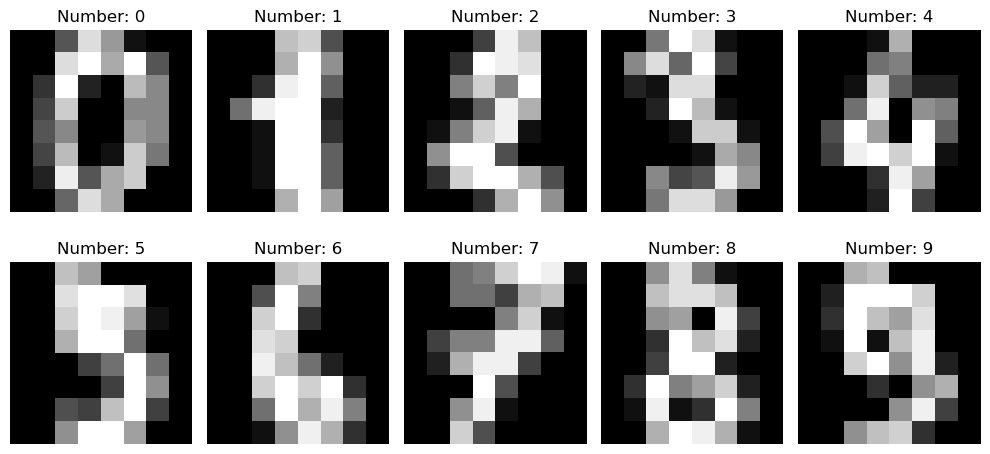

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Number: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

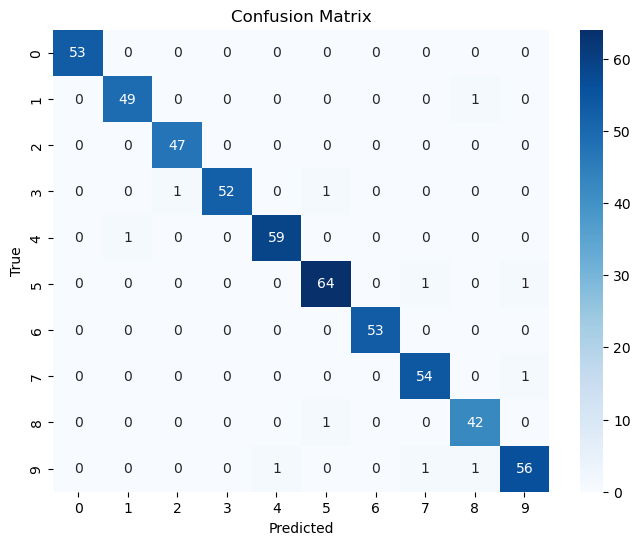

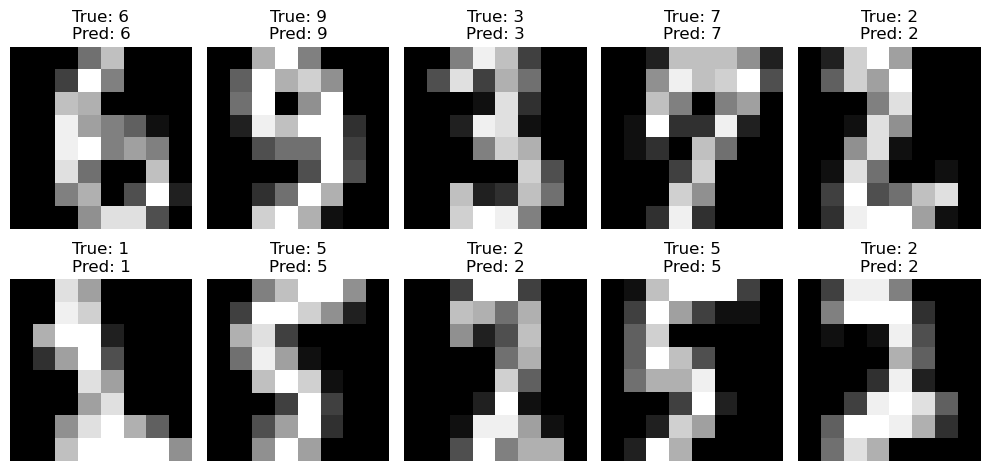

In [9]:
## Load the digits data
digits = datasets.load_digits()
X = digits.data  # shape: (1797, 64)
y = digits.target
class_names = digits.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## Exercise 2: Classification of astronomical objects using Sloan Digital Sky Survey (SDSS) Data release 14
The SDSS (https://www.sdss.org/) is imaging and spectroscopic astronomical survey that utilizes a 2.5-meter optical telescope at Apache Point Observatory in New Mexico, United States.

The data release 14 (DR14) of the SDSS consists of 10,000 observations of various astronomical objects, each described by 17 feature columns and 1 class column which identifies the observation as either a star, galaxy, or quasar. 

#### Goal: build a classification algorithm that predicts if a certain objects is either a star, galaxy or a quasar
Remember to visualize your data!

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (assumes CSV format, e.g., sdss.csv)
df = pd.read_csv("sdss.csv")  # Replace with your path

# View column names (usually includes: 'u', 'g', 'r', 'i', 'z', 'class')
print(df.head())

## df.keys()

          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  549

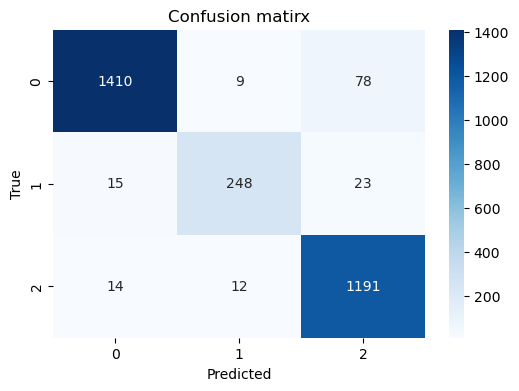

In [27]:
# Preprocessing of target labels: 'STAR', 'GALAXY', 'QSO'
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  

# Features and labels, brightness in different color bands
X = df[['u', 'g', 'r', 'i', 'z']]  
y = df['class']
class_names = le.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model, you can change hyperparameters
model = SVC(kernel='linear', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matirx")
plt.show()



In [25]:
# lets try a different kernel

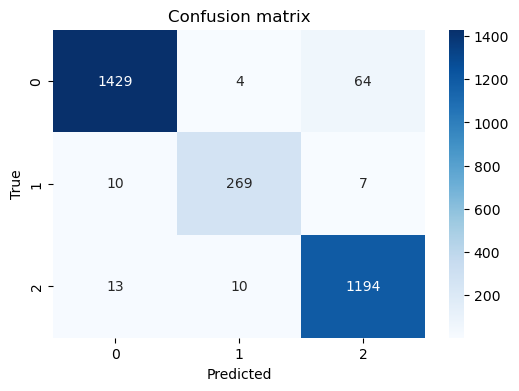

In [31]:
model = SVC(kernel='rbf', C=100.0, gamma='scale')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

